In [1]:
from ase import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from intdielec import plot
from intdielec.workflow.elec_eps import IterElecEps

In [3]:
plot.use_style("pub")

In [4]:
atoms = io.read("./data/coord.xyz")

- [x] generate 3d-pbc calculation
- [x] analyse 3d-pbc pdos data
- [x] generate half-cell config (ref_lo and ref_hi)
- [ ] calculate dipole correction, and get the reference
- [ ] estimate the shift in the potential drop
- [ ] search_lo.000000, etc.
- [x] print info in log file
- [ ] read from checkpoint (?)
- [ ] 

In [5]:
task = IterElecEps(work_dir="test_dir", atoms=atoms)

In [6]:
task.pbc_preset()

In [7]:
task.pbc_calculate()

In [8]:
pbc_pdos_data = np.load("test_dir/pbc/data.npy")
print(pbc_pdos_data.shape)

(4, 97)


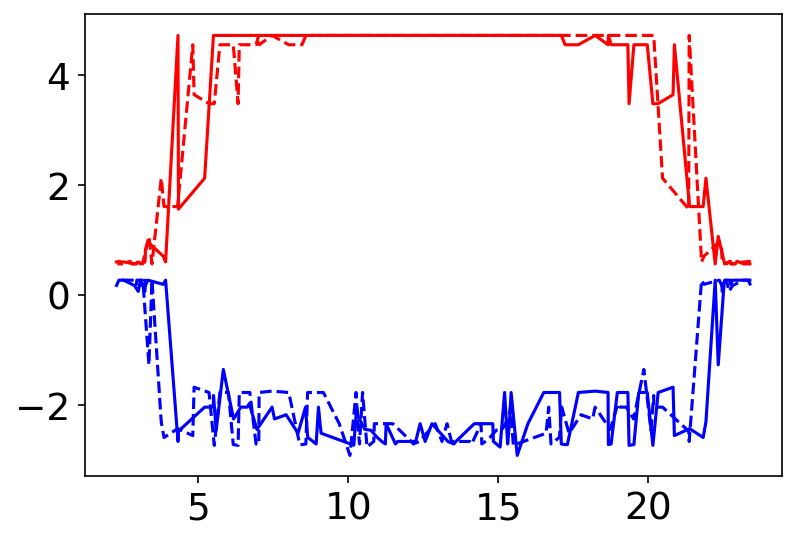

In [9]:
plt.plot(pbc_pdos_data[0], pbc_pdos_data[2], color="red")
plt.plot(pbc_pdos_data[0], pbc_pdos_data[3], color="blue")

plt.plot(pbc_pdos_data[1], pbc_pdos_data[2], ls="--", color="red")
plt.plot(pbc_pdos_data[1], pbc_pdos_data[3], ls="--", color="blue")

plt.show()

In [10]:
task.ref_preset()

In [11]:
task.ref_lo_atoms

Atoms(symbols='H112O56Pt96', pbc=True, cell=[11.246, 11.246, 55.94])

In [12]:
task.ref_hi_atoms

Atoms(symbols='H116O58Pt96', pbc=True, cell=[11.246, 11.246, 55.94])

In [13]:
# task.workflow(configs="data/param.json", ignore_finished_tag=False)